# M-dist vs. Euclidean - 2d

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2



m = 8
# S = np.ones(m)
S = np.random.normal(1.,0.05,m)
# S = np.sqrt(2)**np.arange(m)
k = 2
B, V, S, Theta = create_hyper_module(m, S)

V = np.zeros((m,2))


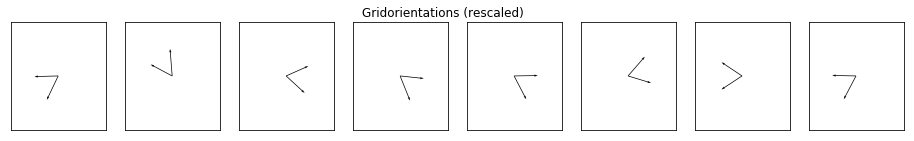

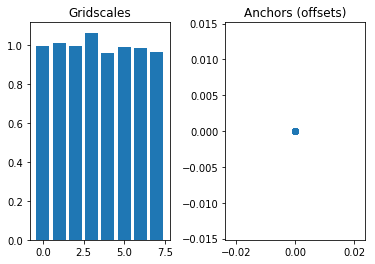

In [8]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Gridorientations (rescaled)")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = B[i,0,:] / S[i]
    r2 = B[i,1,:] / S[i]

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)


plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()



fig, ax = plt.subplots(1, 2);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax[0].set_title("Gridscales")
ax[0].bar(range(m), S)

ax[1].set_title("Anchors (offsets)")
ax[1].scatter(V[:,0], V[:,1])

plt.savefig("media/summary/{}d_scales_m{}.pdf".format(k,m), dpi=150)
plt.show()


(10, 2)
(10, 8, 2)
(2, 16) (10, 16) (10, 16)


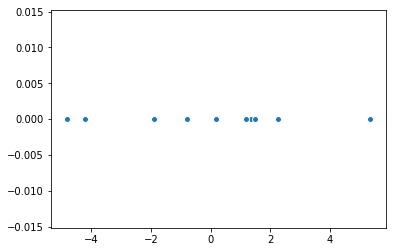

In [9]:


T = 10

X  = np.random.multivariate_normal(mean=np.zeros(k), cov=10.01*np.eye(k), size=T)
X_ = np.random.multivariate_normal(mean=np.zeros(k), cov=10.01*np.eye(k), size=T)

X[:,1] = 0.
X_[:,1] = 0.



print X.shape
P  = map_to_hypertorus(B, V, X )
Q  = map_to_hypertorus(B, V, X_)    

print Q.shape
G = geod_on_hypertorus(P,Q) 
Geod = G.reshape((T,2*m)) 


DP  = map_to_hypertorus(B, V, np.array([ [0.0, 0.0], [0.0, 0.0] ]) )
DQ  = map_to_hypertorus(B, V, np.array([ [0.2, 0.0], [0.0, 0.2] ]))

Leaf = geod_on_hypertorus(DP,DQ)
Leaf = Leaf.reshape((2,2*m)) 
Leaf = Leaf / np.linalg.norm(Leaf, axis=1, keepdims=True)


Rec  =  sum([
            np.sum(Geod*Leaf[[i]], axis=1, keepdims=True)*Leaf[[i]] 
        for i in [0,1]])



print Leaf.shape, Rec.shape, Geod.shape

num_samples = 50
plt.scatter(X[:num_samples, 0], X[:num_samples, 1], edgecolor='white')


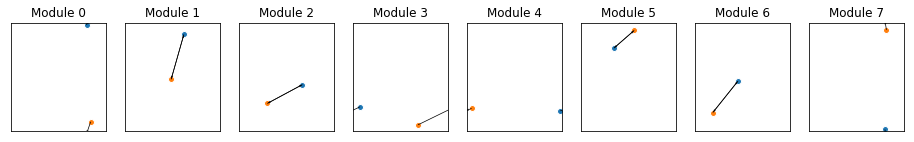

In [10]:



fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(0.,1)
    ax[i].set_ylim(0.,1)

    ax[i].set_xticks([])
    ax[i].set_yticks([])

    num_samples = 1
    ax[i].scatter(P[:num_samples,i,0],P[:num_samples,i,1], edgecolor='white')
    ax[i].scatter(Q[:num_samples,i,0],Q[:num_samples,i,1], edgecolor='white')
    
    ax[i].quiver(P[:num_samples,i,0],P[:num_samples,i,1], G[:num_samples,i,0],G[:num_samples,i,1], angles='xy', scale_units='xy', scale=1) 
    ax[i].quiver(Q[:num_samples,i,0],Q[:num_samples,i,1], -G[:num_samples,i,0], - G[:num_samples,i,1], angles='xy', scale_units='xy', scale=1) 
    
    
#     DX = Leaf[0].reshape((m,2))
#     ax[i].scatter(DP[0,i,0],DP[0,i,1], edgecolor='white')
#     ax[i].scatter(DQ[0,i,0],DQ[0,i,1], edgecolor='white')
    
#     ax[i].quiver(DP[0,i,0], DP[0,i,1],  DX[i,0],  DX[i,1], angles='xy', scale_units='xy', scale=1) 
#     ax[i].quiver(DQ[0,i,0], DQ[0,i,1], -DX[i,0], -DX[i,1], angles='xy', scale_units='xy', scale=1) 
    
    

plt.show()


(100000, 10) (100000, 10)


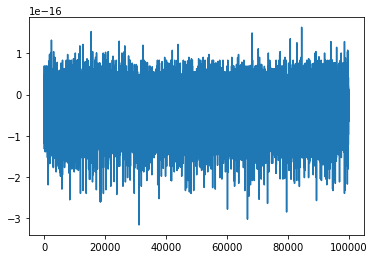

0.932421810396
(100000,) (100000,)


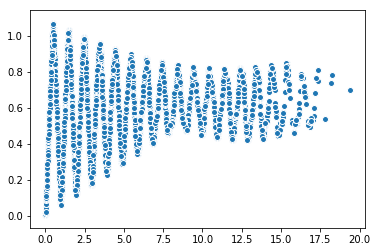

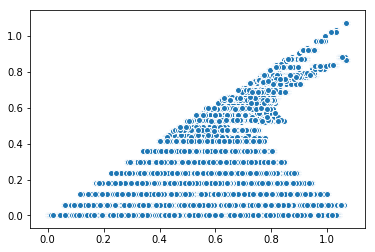

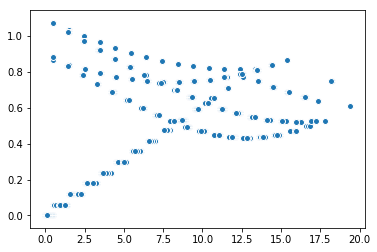

In [344]:
md = M_dist(P, Q, S=S)
ed = np.linalg.norm(X - X_,  axis=1)

print Rec.shape, Geod.shape

Cat = Geod - Rec
C = np.linalg.norm(Cat, axis=1)
# C = np.minimum(C, 2.-C)
# C = np.max(Cat, axis=1)
# C = np.sum(Rec*Geod, axis=1)


plt.plot(np.sum(Cat*Rec, axis=1))
plt.show()
print S[-1]

print ed.shape, C.shape
plt.scatter(ed, md, edgecolor="white")
plt.show()
plt.scatter(md, C, edgecolor="white")
plt.show()
plt.scatter(ed,C  , edgecolor="white")
plt.show()

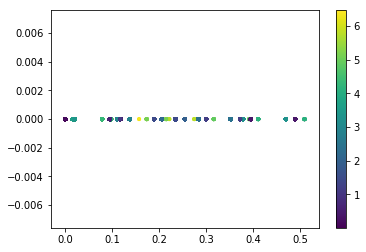

In [259]:
D = np.sort(Cat, axis=1)[:,::-1]
plt.scatter(D[:,0], D[:,1], marker=".",  c=ed)
plt.colorbar()

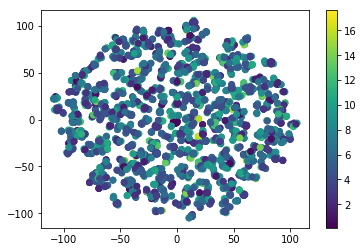

In [18]:
from sklearn.manifold import TSNE






# distM = np.dot(y.T, y)
# distM = np.amax(distM)  - distM


# im = plt.imshow(distM)
# plt.colorbar(im)
# plt.show()

num_samples = 3000

x_tsne = TSNE(n_components=2, 
              perplexity=10.0, 
              early_exaggeration=12.0, 
              learning_rate=50.0, 
              n_iter=2000 ).fit_transform(Cat[:num_samples])


sc = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=ed[:num_samples])
plt.colorbar(sc)

[  2.74124880e+07   6.44000000e+02   5.50000000e+01   1.50000000e+01
   4.00000000e+00   3.00000000e+00]


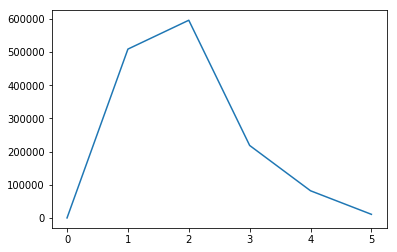

In [94]:
b = 0.1

data =[
(27412488.0, 27412488.09375),
(644.0, np.array([84.79793549,644.90625])),
(55.0, np.array([37.24853516,55.8984375,15.69189453])),
(15.0, np.array([15.203125,3.,11.3828125,3.21484375])),
(4.0, np.array([1.7890625,2.37029927,4.57485744,3.00644017,1.640625])),
(3.0, np.array([1.39672852,2.61914062,0.08752441,0.05566406,0.98950195,3.625]))
]

vol = np.array([ v  for v, x in data ])

vol_ = vol*(b**np.array([5,4,3,2,1,0]))

print vol

vol_t2m = np.prod((np.sqrt(2)**np.arange(0,6))**2)

# plt.plot(np.log(vol_))
plt.plot(vol_t2m/vol_)
# plt.plot(np.log(vol_))



In [58]:
m = 6
S = np.sqrt(2)**np.arange(0,m)
S_ = 1./S

print S_
print np.sqrt(np.sum(S_**2))




[ 1.          0.70710678  0.5         0.35355339  0.25        0.1767767 ]
1.40312152004


In [60]:
print S_

[ 1.          0.70710678  0.5         0.35355339  0.25        0.1767767 ]


In [66]:
A = np.array([[[-0.9314157780375988,
0.9674712609034084,
0.10891436386302311,
0.9457018879335534,
0.6641498475263972,
0.813155799001399],
[0.36395693209858543,
0.25298094656706677,
-0.9940511361817926,
0.3250352890978344,
0.747599478350984,
0.5820460862770201]],
[[-0.5073423124611024,
0.7054569085438595,
-0.4135198159046527,
0.07440164756098695,
-0.6073092793813998,
0.41170890960065476],
[0.49254824939961067,
0.048275772264569125,
0.5735864031287544,
-0.7031816229397713,
0.36218150032441593,
-0.5748876183702688]],
[[0.44565370800990656,
0.4082683021037986,
-0.4793051706144288,
0.4223276629602965,
0.03537041055491136,
-0.4987753647618517],
[-0.2266997409284378,
0.28864683178112543,
0.14236064562326645,
0.26765527287631385,
-0.4987473649626401,
0.03497335423835906]],
[[-0.29089136246246244,
0.16989609542285952,
-0.23923077428385287,
0.21387376588069054,
0.3360910743979873,
-0.07233792101576068],
[-0.2009532663201378,
0.31005695728376514,
0.26032409922162064,
-0.2815279955315484,
0.10973964511518414,
0.34607401691418194]],
[[0.146033805897261,
0.042871368918802916,
0.20233266507245462,
0.077279820424859,
0.24800719370660856,
0.09169341546807214],
[-0.20291408905041824,
-0.24629666202981285,
0.14683832144463477,
-0.23775581876181606,
0.03150288668951956,
0.23257755171082073]],
[[-0.12936337427744593,
-0.1225163787086402,
0.1711112918098851,
-0.17631710721038277,
0.17676528302353042,
-0.1716086805215516],
[0.12047870100376007,
-0.12743522648043998,
0.04439511026174311,
-0.012738826671336712,
-0.002008660651071299,
0.04243183674615115]]])

In [132]:
print A.shape
print S
A_ = A/S.reshape((6,1,1))
A_ = A_.reshape((12,6))
print A_.shape

normA_ = np.linalg.norm(A_, axis=0)
normA = np.linalg.norm(A.reshape((12,6)), axis=0)
print normA_
print normA 

v0 = A_[:,0]
v1 = A_[:,1]
v2 = A_[:,2]

v1 = v1 - np.sum(v0*v1) * v0/(np.linalg.norm(v0)**2)
v2 = v2 - np.sum(v0*v2) * v0/(np.linalg.norm(v0)**2) - np.sum(v1*v2) * v1/(np.linalg.norm(v1)**2)


q1 = np.linalg.norm(v0)
q2 = np.linalg.norm(v0)*np.linalg.norm(v1)
q3 = np.linalg.norm(v0)*np.linalg.norm(v1)*np.linalg.norm(v2)

print q1, q2, q3


(6, 2, 6)
[ 1.          1.41421356  2.          2.82842712  4.          5.65685425]
(12, 6)
[ 1.15455958  1.15455958  1.15455958  1.15455958  1.15455958  1.15455958]
[ 1.40312152  1.40312152  1.40312152  1.40312152  1.40312152  1.40312152]
1.15455957512 0.927503407073 0.86380067582


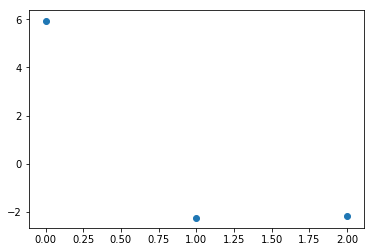

In [117]:

bv = b
v_ = np.array([vol[0]*q1*bv**5, vol[1]*q2*bv**4, vol[2]*q3*bv**3])


plt.scatter(np.arange(3), np.log(v_))

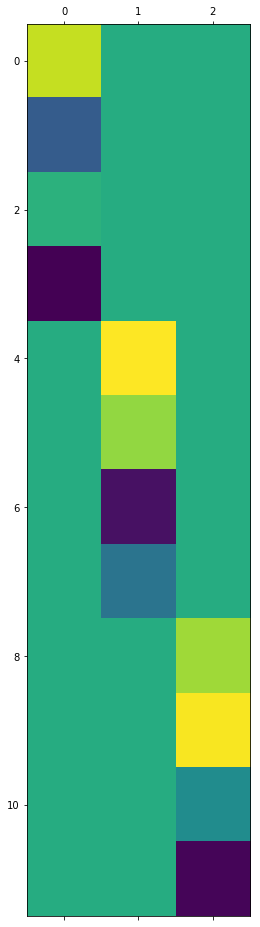

In [37]:
def get_me_this_A_your_talking_about(k, m):
    A = np.zeros((m,2,k))

    frac = m//k
    for i in range(k):
        for j in range(0, frac):
            theta = np.random.sample()*np.pi*2.
            a = np.array([np.cos(theta), np.sin(theta)])
            A[i*frac + j, :, i] = a * np.sqrt(2)**j
    
    return A


    
m = 6
k = 3


A = get_me_this_A_your_talking_about(k, m)
plt.matshow(A.reshape((2*m,k)));
            

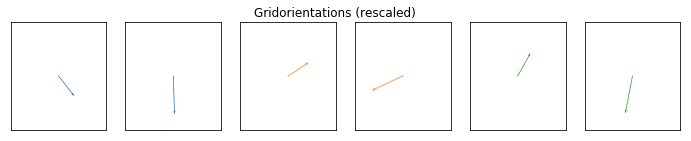

In [38]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Gridorientations (rescaled)")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = A[i,0]
    r2 = A[i,1]
    

    for j in range(k):
        ax[i].quiver(0.0,0.0,r1[j],r2[j], angles='xy', scale_units='xy', scale=1, color="C{}".format(j))


plt.show()


